KN-414
Maksymets Vira
var. 2

In [130]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import copy

In [208]:
images = ['low_detaliz.jpg', 'low_contrast.jpg','high_contrast.jpg','high_detaliz.jpg']

In [182]:
def _2Dfilter(image, K):
    kernel = np.ones((K,K),np.float32)/25
    
    m, n = image.shape
    k, l = kernel.shape
    
    # Empty output image
    output = np.zeros((m,n))
    
    # Create border
    p = k // 2
    q = l // 2
    image_padded = copy.deepcopy(np.zeros((m + 2*p, n + 2*q)))
    image_padded[p:-p, q:-q] = copy.deepcopy(image)

    for i in range(p, m+p):
        for j in range(q, n+q):
            
            # Extract the kernel part
            mask = copy.deepcopy(image_padded[i-p:i+p+1, j-q:j+q+1])
            
            # Apply the kernel
            output[i-p,j-q] = np.sum(mask * kernel)
    
    return output.T

In [206]:
def plot(im, K):
    plt.title('Kernel size = '+str(K))
    plt.imshow(im, cmap='gray')
    plt.show()

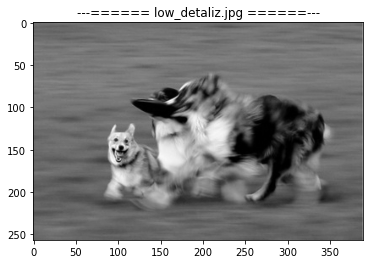

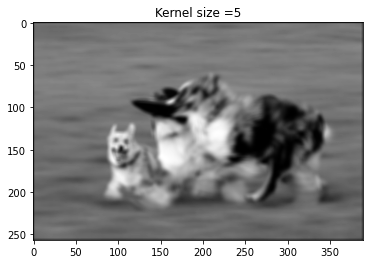

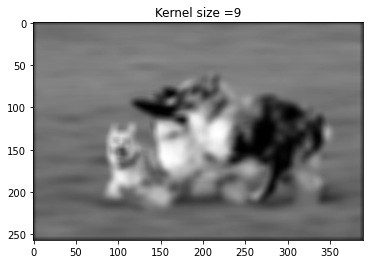

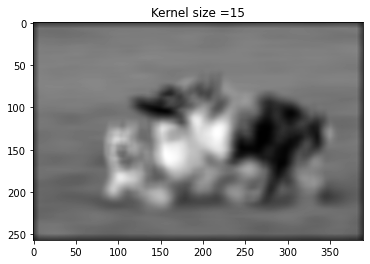

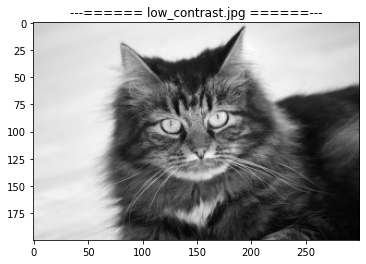

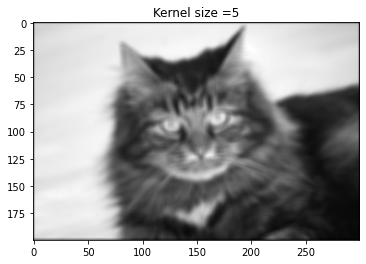

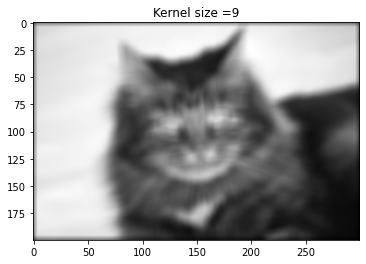

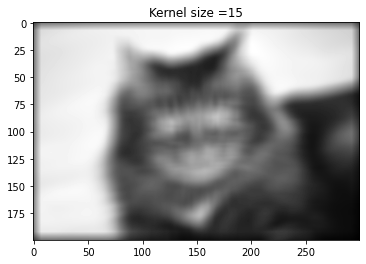

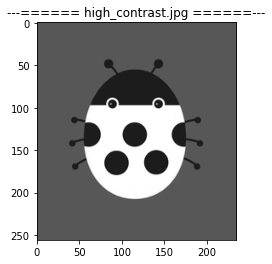

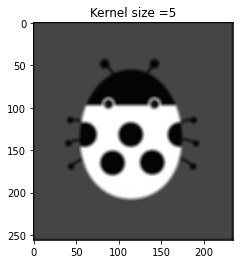

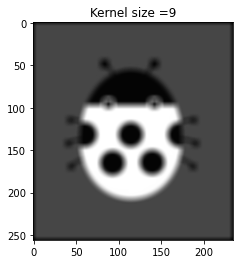

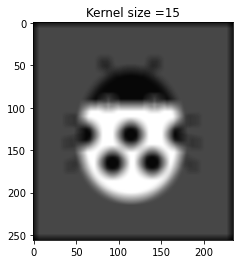

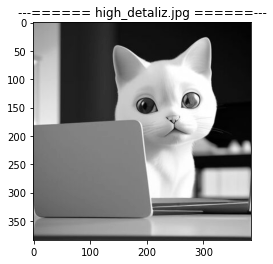

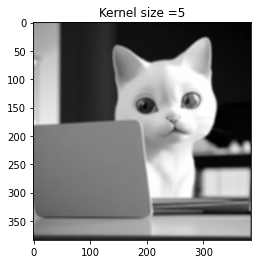

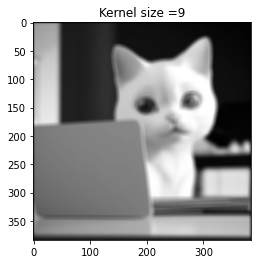

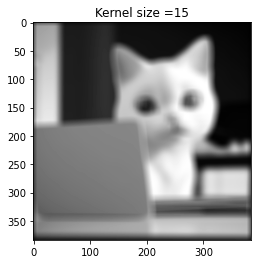

In [214]:
for sample in images:
    img = Image.open(sample)
    img = ImageOps.grayscale(img)
    plt.title('---====== '+sample+' ======---')
    plt.imshow(img, cmap='gray')
    plt.show()
    
    pix = np.array(img)
    pix = pix.T # Transpose
    
    res = [5, 9, 15]
    for i in res:
        imgs = _2Dfilter(pix, i)
        plot(imgs, str(i))